In [482]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [483]:
data=pd.read_csv(r"D:\Projects_Ml\Sentiment_Analysis\Data\data_after_clean\arabic_sentence_level_back_translation.csv")
data.sample(3)

,text,label
51670,أظن أن الدكتور أخذته العاطفه تجاه الإسلام أكثر...,1
106054,جيد . لا بأس لاكن كله جنسيه هنديه وريحت الاستق...,0
9219,اليوم الثلاثاء الساعة الحادية عشرة والنصف صباح...,2


In [484]:
data.isnull().sum()

text     1
label    0
dtype: int64

In [485]:
data.dropna(subset=['text'], inplace=True)
print(data.isnull().sum())

text     0
label    0
dtype: int64


In [486]:
print(data['text'].duplicated().sum())
#data.drop_duplicates(subset=['text'], inplace=True)

0


In [487]:
data['label'].value_counts()

label
2    39074
1    38135
0    38128
Name: count, dtype: int64

Clean Data from stopwords , punctuaion before Visualization

In [488]:
import re

def normalize_ar(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    return text


In [489]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# Arabic stopwords
AR_STOPWORDS = set(stopwords.words('arabic'))

# important Negative sentiment
NEGATION_WORDS = {"لا", "لم", "لن", "ما", "مش", "ليس", "بدون", "مافيش"}

# out negative from  stopwords
AR_STOPWORDS -= NEGATION_WORDS

# Stopwords 
EXTRA_STOPWORDS = {
    "على", "الى","الي", "إلى", "في", "عن", "مع",
    "اللي", "الذي", "التي", "الذين",
    "كان", "كانت", "يكون", "تكون",
    "انه", "إنه", "أن", "إن",
    "هذا", "هذه", "ذلك", "تلك",
    "جدا", "جداً", "مره", "مرة",
    "علي", "الى", "اي", "أى",
    "بقى", "بس", "كده"
}

AR_STOPWORDS |= EXTRA_STOPWORDS


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [490]:
def remove_ar_stopwords(text):
    return " ".join(
        w for w in text.split()
        if w not in AR_STOPWORDS
    )

Arabic Cleaning Function (Production-Ready)

In [492]:
def clean_arabic(text):
    text = str(text)
    # remove URLs, mentions, hashtags
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", "", text)

    # keep Arabic letters only
    text = re.sub(r"[^\u0600-\u06FF\s]", " ", text)

    # normalize
    text = normalize_ar(text)

    tokens = text.split()

    tokens = [
        word for word in tokens
        if word not in AR_STOPWORDS
        and len(word) > 2
    ]
    return " ".join(tokens)

In [493]:
data["clean_text"] = data["text"].apply(clean_arabic)

In [494]:
data.sample(3)

,text,label,clean_text
70986,مقبول، موقع على الحرم الجامعي وممر متعب,1,مقبول، موقع الحرم الجامعي وممر متعب
22153,فندق جيد مقابل القيمة المالية . مديرين الفندق ...,2,فندق جيد مقابل القيمه الماليه مديرين الفندق يت...
2710,رواية مذهلة، لا أعرف كيف سمحت لنفسي أن أؤجل قر...,2,روايه مذهله، اعرف سمحت لنفسي اؤجل قراءتها طوال...


Text Length

In [495]:
data['word_len'] = data['clean_text'].apply(lambda x : len(x.split()))
data['char_len'] = data['clean_text'].apply(len)

In [496]:
data.sample(3)

,text,label,clean_text,word_len,char_len
42618,مرضي. فندق مريح. الافطار متأخر,1,مرضي فندق مريح الافطار متاخر,5,28
78336,من اسوء الفنادق في ابوظبي . . لايوجد موظف يحمل...,0,اسوء الفنادق ابوظبي لايوجد موظف يحمل الحقائب و...,22,157
29707,يعد الخبز الحافي أول رواية كاملة أقرأها باللغة...,2,يعد الخبز الحافي اول روايه كامله اقراها باللغه...,42,268


In [497]:
data=data[['clean_text','label','word_len','char_len']]
data

,clean_text,label,word_len,char_len
0,ممتاز نوعا النظافه والموقع والتجهيز والشاطيء ا...,2,7,51
1,التنظيف، الموقع، الاعداد، الشاطئ، المطعم,2,5,40
2,احد اسباب نجاح الامارات شخص الدوله يعشق ترابها...,2,41,231
3,هادفه وقويه تنقلك صخب شوارع القاهره هدوء جبال ...,2,31,198
4,خلصنا مبدئيا مستني ابهار الفيل الازرق ميقراش ا...,2,80,463
...,...,...,...,...
115333,معرفش ليه كنت عاوزه اكملها وهي عاجباني البدايه...,0,25,152
115334,يستحق بوكنق لانه سيئ يوجد خدمه افطار صباحي مست...,0,11,60
115335,كتاب ضعيف ولم استمتع قصه سرد لحاله مشهد بدون ف...,0,11,55
115336,ممله محمد حسن علوان فنان بالكلمات، والوصف عنده...,0,21,119


Sentiment Distribution

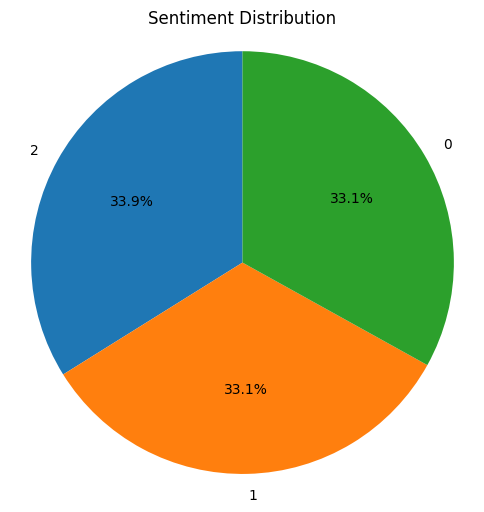

In [498]:
plt.figure(figsize=(6,6))

data['label'].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)

plt.title("Sentiment Distribution")
plt.ylabel("")   
plt.axis('equal')  
plt.show()


In [559]:
AR_GENERIC_WORDS = {
    "كتاب","الكتاب","روايه","الروايه",
    "فندق","الفندق","غرف","الغرف","مكان" ,"شيء","الموقع","الغرفه"
}

In [560]:
def clean_arabic_for_tfidf(text):
    text = re.sub(r"[ًٌٍَُِّْـ]", "", text)  # remove tashkeel
    words = text.split()
    words = [w for w in words if w not in AR_GENERIC_WORDS]
    return " ".join(words)


In [593]:
def get_top_tfidf_words_by_label(data, label, n=10):

    texts = (
        data[data['label'] == label]['clean_text']
        .dropna()
        .astype(str)
        .apply(clean_arabic_for_tfidf)
    )

    tfidf = TfidfVectorizer(
        max_features=800,
        # ngram_range=(1,2),
        min_df=3,
        token_pattern=r"(?u)\b[\u0600-\u06FF]{2,}\b"
    )

    X = tfidf.fit_transform(texts)

    feature_names = tfidf.get_feature_names_out()
    scores = X.mean(axis=0).A1

    df = pd.DataFrame({
        "word": feature_names,
        "score": scores
    })

    return df.sort_values("score", ascending=False).head(n)


In [594]:
df_pos_imp = get_top_tfidf_words_by_label(data, label=2 ,n=5)
df_neu_imp = get_top_tfidf_words_by_label(data, label=1,n=5)
df_neg_imp = get_top_tfidf_words_by_label(data, label=0 , n=5)

In [595]:
# !pip install arabic-reshaper python-bidi
import arabic_reshaper
from bidi.algorithm import get_display

def arabic_display(text):
    reshaped = arabic_reshaper.reshape(text)
    return get_display(reshaped)


In [596]:
df_pos_imp['word'] = df_pos_imp['word'].apply(arabic_display)
df_neu_imp['word'] = df_neu_imp['word'].apply(arabic_display)
df_neg_imp['word'] = df_neg_imp['word'].apply(arabic_display)

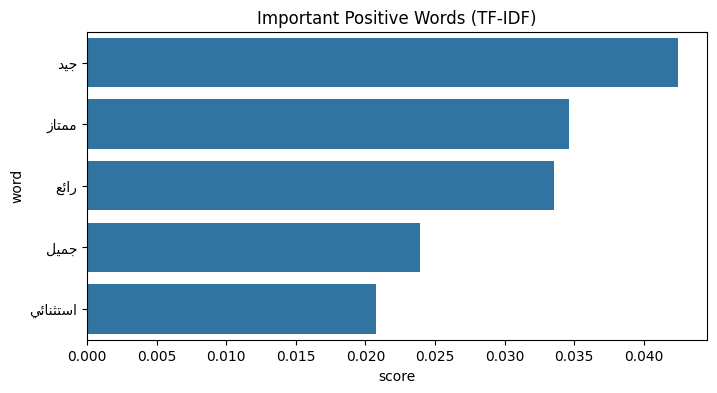

In [597]:
plt.figure(figsize=(8,4))
sns.barplot(x="score", y="word", data=df_pos_imp)
plt.title("Important Positive Words (TF-IDF)")
plt.show()

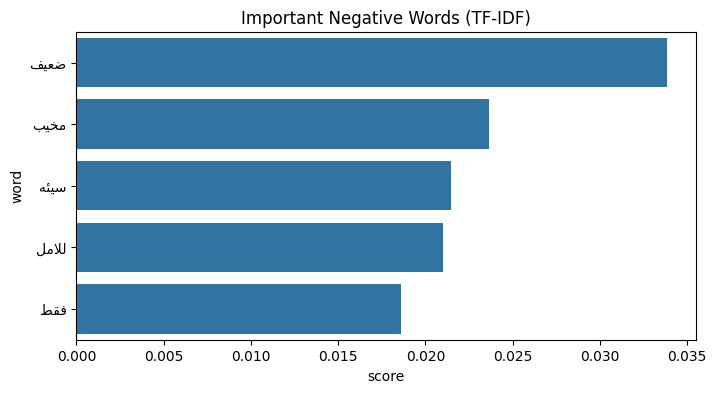

In [598]:
plt.figure(figsize=(8,4))
sns.barplot(x="score", y="word", data=df_neg_imp)
plt.title("Important Negative Words (TF-IDF)")
plt.show()

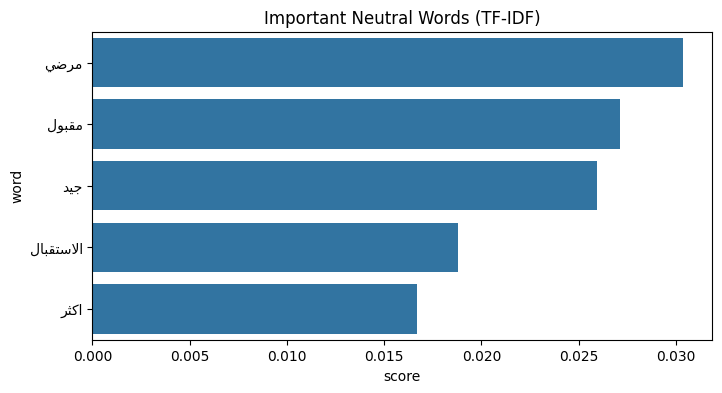

In [599]:
plt.figure(figsize=(8,4))
sns.barplot(x="score", y="word", data=df_neu_imp)
plt.title("Important Neutral Words (TF-IDF)")
plt.show()